In [ ]:
import os
import sys
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
# requires allensdk to work, which has many (redundant?) dependencies and clashes (?) with pytorch 

# loading scripts
# sys.path.append(os.path.join(os.getcwd(), 'scripts')) #if only one function is needed
from scripts.loader import *

In [2]:
# set data directory
DATA_DIR = './data'
SESSION_ID = 0

In [3]:
cache, sessions = load_cache(DATA_DIR)
# print available info
print(f'{len(sessions)} sessions available')
print(f'Each session contains the following info: {sessions.columns}')

27 sessions available
Each session contains the following info: Index(['published_at', 'specimen_id', 'session_type', 'age_in_days', 'sex',
       'full_genotype', 'unit_count', 'channel_count', 'probe_count',
       'ecephys_structure_acronyms'],
      dtype='object')


In [ ]:
%%capture
#load single session
session, V1_units = get_single_session(cache, sessions, SESSION_ID, filter = 'VISp')
print('Total number of low contamination units:' + str(len(V1_units)))

In [ ]:
%%capture
#select stimuli with >100 presentations and not movies
stim_cats, stim_table = get_stimuli(session)
print(f'selected stimuli: {stim_cats}')

In [7]:
# get firing rates
firing_rates_all_stim = generate_firing_rates(session, stim_table, V1_units)

100%|██████████| 15595/15595 [02:04<00:00, 125.73it/s]


In [8]:
# get y
stim_rename = {cat : i for i, cat in enumerate(stim_cats)}
y_np = stim_table['stimulus_name'].replace(stim_rename).to_numpy()

In [14]:
save_data(firing_rates_all_stim, y_np, SESSION_ID, DATA_DIR)

In [15]:
y_np.shape

(15595,)

In [16]:
firing_rates_all_stim.shape

(15595, 93, 252)

[Text(0.5, 0, 'bins, w = 10'), Text(0, 0.5, 'unit, sorted ID')]

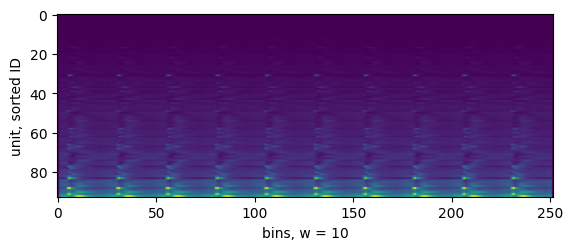

In [17]:
fig, ax = plt.subplots()
ax.imshow(np.mean(firing_rates_all_stim, axis = 0))
ax.set(xlabel = 'bins, w = 10', ylabel = 'unit, sorted ID')

(array([47., 26.,  9.,  3.,  4.,  1.,  1.,  1.,  0.,  1.]),
 array([5.12984931e-04, 4.97407887e+00, 9.94764476e+00, 1.49212106e+01,
        1.98947765e+01, 2.48683424e+01, 2.98419083e+01, 3.48154742e+01,
        3.97890401e+01, 4.47626060e+01, 4.97361718e+01]),
 <BarContainer object of 10 artists>)

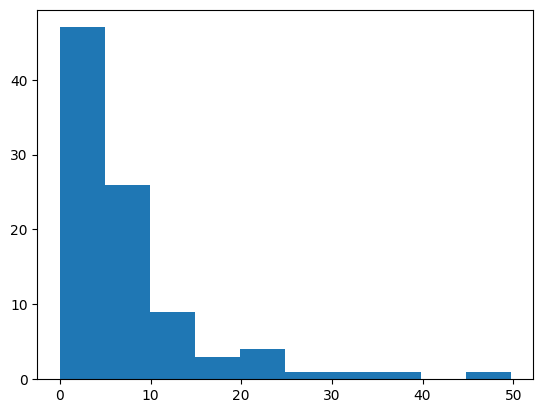

In [18]:
plt.hist(np.mean(np.sum(firing_rates_all_stim, axis = 2), axis = 0)/2.5)